# import the preprocessed datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import tree, metrics
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn

In [2]:
train = pd.read_csv('../data_frames/train_data', index_col=None, header=0)
test = pd.read_csv('../data_frames/test_data', index_col=None, header=0)

In [3]:
y_train = train['goal_val'].values
y_test = test['goal_val'].values
X_train = train.drop(['goal_val'], axis=1).values
X_test = test.drop(['goal_val'], axis=1).values

In [4]:
hot_X_train = X_train.copy()
hot_X_train[hot_X_train > 0] = 1

hot_X_test = X_test.copy()
hot_X_test[hot_X_test > 0] = 1

In [5]:
X_train = hot_X_train
X_test =  hot_X_test

## assign data to variables

In [6]:
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.7)

In [7]:
dtype = torch.float
device = torch.device("cpu")

In [8]:
x_torch_train = torch.tensor(X_train, device=device, dtype=dtype)

y_torch_train = torch.tensor(y_train, device=device, dtype=torch.long)

x_torch_val = torch.tensor(X_val, device=device, dtype=dtype)

y_torch_val = torch.tensor(y_val, device=device, dtype=torch.long)

In [9]:
x_torch_train.shape

torch.Size([887, 1000])

In [10]:
y_torch_train.shape

torch.Size([887])

---

In [11]:
# N sind die Anzahl der Datenpunkte 
# D_in ist die Input-Dimension
# D_out ist die Output-Dimension
D_in, N_classes = 1000, 50
H = 512
#H2 = 256
#H3 = 128

In [12]:
### 2-Layer-Network
model = torch.nn.Sequential(   
    nn.Linear(D_in, H),
    nn.ReLU(),
    #nn.Linear(H, H2),
    #nn.ReLU(),
    #nn.Linear(H2, H3),
    #nn.ReLU(),
    nn.Linear(H, N_classes)
)

In [13]:
learning_rate = 0.001
weight_decay = 0.01

In [14]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = weight_decay)

In [15]:
loss_hist = []
val_loss_hist = []

In [16]:
# Train
for t in range(1000):
    # Berechne die Vorhersage (foward step)
    outputs = model(x_torch_train)
    val_outputs = model(x_torch_val) 
    # Berechne den Fehler (Ausgabe des Fehlers alle 100 Iterationen)
    loss = criterion(outputs, y_torch_train)
    val_loss = criterion(val_outputs, y_torch_val)
    # Berechne die Gradienten und Aktualisiere die Gewichte (backward step)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Berechne den Fehler (Ausgabe des Fehlers alle 100 Iterationen)
    #if t % 1000 == 0:
    loss_hist.append(loss.item())
    val_loss_hist.append(val_loss.item())
    #    print(t, loss.item())

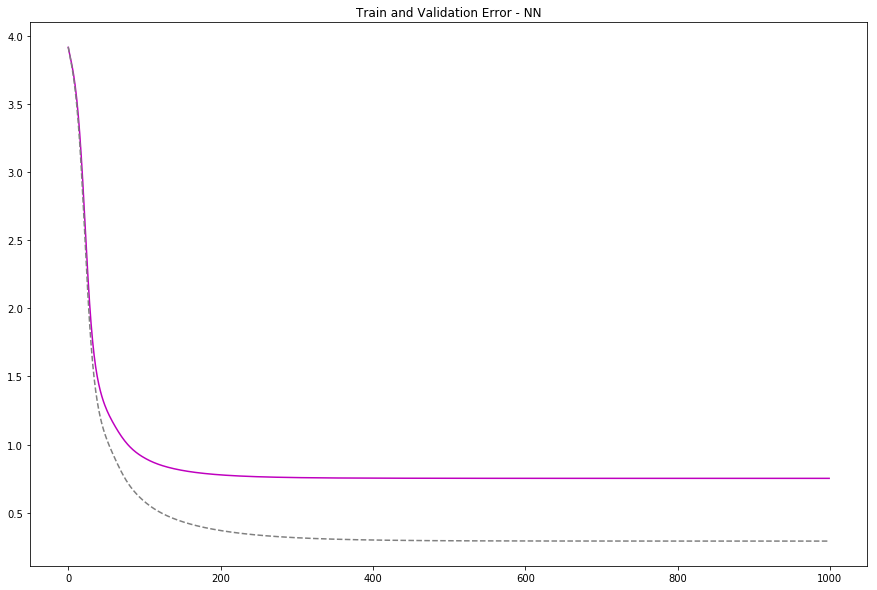

In [17]:
plt.figure(1, figsize=(15,10))
plt.plot(val_loss_hist, color='m', lw=1.5)
plt.plot(loss_hist, color='grey', lw=1.5, linestyle='--')
plt.title('Train and Validation Error - NN')
plt.show();

In [18]:
torch.max(model(x_torch_train), 1)

(tensor([ 8.4777,  7.9799,  6.0364,  7.3885,  7.1199,  7.0275,  5.6144,  7.8276,
          6.4891,  7.2000,  6.6759,  7.7390,  5.7317,  7.0637,  8.7738,  7.1218,
          6.9366,  8.3065,  7.2660,  6.8928,  6.1931,  7.6859,  6.7866,  7.1826,
          7.9400,  6.3650, 10.2348,  6.1875,  5.9105,  6.9055,  8.1195,  7.5628,
          5.9806,  6.4075,  9.2387,  7.6873,  6.1367,  6.1426,  7.4236,  7.2735,
          6.9823,  7.4621,  7.8481,  8.4654,  6.7546,  6.4751,  5.9485,  7.5442,
          6.2112,  8.4654,  8.0222,  5.9091,  8.3983,  6.1867,  6.9191,  7.9670,
          7.6233,  6.4580,  5.9799,  7.0271,  6.4710,  8.5471,  6.7018,  8.6714,
          7.8134,  7.5652,  7.1456,  6.8197,  6.2239,  7.7714,  9.9835,  8.1857,
          6.5733,  6.6645,  6.2776,  8.8543,  7.1282,  7.0727,  9.9625,  7.6445,
          6.8995,  6.9699,  6.1931,  7.1574,  8.3036,  8.0854,  7.3851,  7.5156,
          7.9506,  7.9270,  8.4351,  7.9004,  7.6233,  7.2171,  7.4219, 10.9593,
          6.8653,  8.6450,  

---

In [19]:
x_torch_test = torch.tensor(X_test, device=device, dtype=dtype)

y_torch_test = torch.tensor(y_test,device=device, dtype=torch.long)

In [20]:
softmax = torch.nn.Softmax()

y_test_pred = softmax(model(x_torch_test)).argmax(1)
y_train_pred = softmax(model(x_torch_train)).argmax(1)

/anaconda3/envs/toolbox/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/toolbox/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


In [21]:
train_accuracy = accuracy_score(y_torch_train, y_train_pred)
test_accuracy = accuracy_score(y_torch_test, y_test_pred)

In [22]:
print(f'The TRAIN prediction is {train_accuracy*100} % ACCURATE')
print(f'The TEST prediction is {test_accuracy*100} % ACCURATE')

The TRAIN prediction is 94.47576099210822 % ACCURATE
The TEST prediction is 66.45833333333333 % ACCURATE


---